In [1]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

 #### Total Energies in eV

In [2]:
E0=-3324932.942491689 # pristine
E1=-3335811.376811718# addon S
E2=-3314050.981984572 # mono S vacancy
E3=-3303169.071443753 # di S vacancy up&down
E4=-3303169.047079117 # di S vacancy neighboring
E5=-3213689.419187400  # mono Mo vacancy
E_MoS2=-132997.116189474 # primtitive
ES8=-87041.767621284
EMo=-222478.55890044803

In [3]:
xr=np.array(np.arange(473,1600,10))
xr=1/xr
yr=(4.1879-(3209*xr))

pS=np.exp(yr)


#### Constants

In [4]:
pi=numpy.pi
convert=29979245800.0*2*pi #cm^-1 to Hz

# Calculation of $\mu_S$ on full temperature Range

In [5]:
p0=1013250  # atm to g/(cm s^2)
p=3.3108987*p0# 1.89e-3 atm (atm to cgs * 1013250))
kk=1.380649e-16 # erg/k (cm^2.g/ks^2)
k=8.617333262145e-05 # ev/k
h=6.62607015e-27  # erg.s 
hb=6.582119569e-16 # eV.s
hbar=1.054571817e-27 # erg.s
sigma=8
m=4.258952992e-22 # 32.06*8 in amu changed to g
IA=1.314051643394595e-37 # g.cm^2
IB=1.314146807283309e-37
IC=2.42660958899724e-37

In [6]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VMo', sep='\s+',header=0)
dS=pd.read_csv('w', sep='\s+',header=0)
dW=pd.read_csv('x', sep='\s+',header=0)

wW=dW['x']*convert 
wS8=dS['x']*convert 
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VMo']*convert #THZ to Hz

## $$ \mu=\mu_{0}+ kT \ln\frac{p}{p_{0}}+ E_{DFT}+ \sum_{i}\frac{\hbar \omega_{i}}{2}$$

In [7]:
def free_energy(omega):
   F=[]
  
   omega = numpy.array(omega)
   for T in arange(473,1600,10):
      
     temp3=numpy.array([(hb*i/2 + k*T*np.log(1-math.exp(-(hb*i)/(k*T)))) for i in omega])
     F.append(numpy.sum(temp3))

   return F


In [8]:
def DeltaF(X,Y):
   deltaF=[]
   F1=free_energy(X)
   F2=free_energy(Y)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 


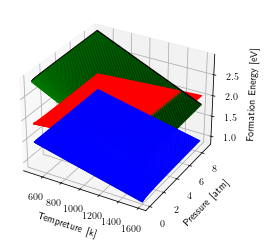

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for p in pS*p0: 
   D=[]
   E=[]
   mu_0=[]
   mu_S8=[]
   mu_S=[] 
   addS=[]
   VS=[]
   VS2=[]
   VS22=[] 
   I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
   for T in arange(473,1600,10):
        A=np.log((((2*pi*m)**(3/2))*((kk*T)**(5/2)))/(p0*(h**3)))
        B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*kk*T)/(h**2))**(3/2))*I)
        temp=numpy.array([(np.log(1-math.exp(-(hbar*i)/(kk*T)))) for i in wS8])
        C=np.sum(temp)
        E.append(k*T*np.log(p/p0))
        mu_0.append(-k*T*(A+B-C)) 
        

#print('E',E)
#print('mu_0', mu_0)
   temp2=numpy.array([(hb*i)/(2) for i in wS8])
   D=np.sum(temp2)
   mu_S8=np.array(mu_0) + np.array(E) + D + ES8 
   mu_S=np.array(mu_S8)/8
   addS = [E1-E0-a + b for a, b in zip(mu_S, DeltaF(w1,w0))]
   VS = [E2-E0+a + b for a, b in zip(mu_S, DeltaF(w2,w0))]
   VS2 = [E3-E0+2*a + b for a, b in zip(mu_S, DeltaF(w3,w0))]
   VS22 = [E4-E0+2*a + b for a, b in zip(mu_S, DeltaF(w4,w0))]
#VMo = [E5-E0+a + b for a, b in zip(mu_Mo, DeltaF(w5,w0))]
   
   #mu_S8=np.array(mu_0) + np.array(E) + D + ESe8 
   
   T=arange(473,1600,10)
   a = np.empty(np.size(addS))
   a.fill(p)
 #  ax = plt.axes(projection='3d')
# Data for a three-dimensional line
   z1 = a/p0
    
#   print(z1)



   ax.plot3D(T, z1,np.array(addS),'r')
   ax.plot3D(T, z1,np.array(VS),'b')
   ax.plot3D(T, z1,np.array(VS2),'g')
   ax.plot3D(T, z1,np.array(VS22),'k')
ax.set_xlabel(' Tempreture [k]')
ax.set_zlabel(' Formation Energy [eV]')
ax.set_ylabel(' Pressure [atm]')
#print(y22)
#plt.savefig('3D.png',dpi=400) 
plt.show()
